<a href="https://colab.research.google.com/github/bingjun5249/bootcamp/blob/main/bootcampLecture02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install uproot3

     |████████████████████████████████| 122kB 5.4MB/s 
     |████████████████████████████████| 92kB 4.2MB/s 


In [3]:
import uproot3 as ROOT
import uproot3_methods as ROOT_methods 
import numpy as np
import awkward0 as ak
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import font_manager


In [4]:
tree = ROOT.open("drive/MyDrive/rootfiles/unweighted_events.root")["LHEF"]

In [5]:
px = tree["Particle.Px"].array()
py = tree["Particle.Py"].array()
pz = tree["Particle.Pz"].array()
en = tree["Particle.E"].array()
pid = tree["Particle.PID"].array()
status = tree["Particle.Status"].array()


In [23]:
# mask for electron and positron
nege = (pid == 11) & (status == 1)
pose = (pid == -11) & (status == 1)

In [24]:
# electron px, py, pz, E
px_nege = px[nege]
py_nege = py[nege]
pz_nege = pz[nege]
en_nege = en[nege]

In [25]:
# positron px, py, pz, E
px_pose = px[pose]
py_pose = py[pose]
pz_pose = pz[pose]
en_pose = en[pose]

In [26]:
# To make Lorentz vectors, we can use the uproot_methods module
vec_nege = ROOT_methods.TLorentzVectorArray.from_cartesian(px_nege,py_nege,pz_nege,en_nege)
vec_pose = ROOT_methods.TLorentzVectorArray.from_cartesian(px_pose,py_pose,pz_pose,en_pose)

In [27]:
# calculation
dilepton_mass = []
for i in range(len(px)):
  if px_nege.counts[i] == 0:
    continue
  elif px_pose.counts[i] == 0:
    continue
  else:
    dilepton_mass.append((vec_nege[i,0] + vec_pose[i,0]).mass)

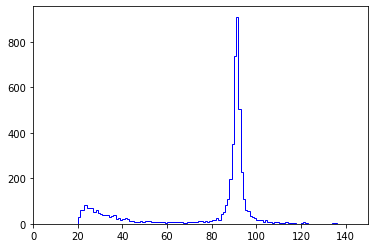

In [28]:
# Draw histograms
plt.hist(dilepton_mass,bins=150,range=(0,150),color='blue',histtype='step')
plt.xlim(0,150)
plt.show()

In [29]:
# Q1
px_nege

<JaggedArray [[21.817482672] [14.214499687] [30.159972427] ... [] [] [3.2613954829]] at 0x7fcc005eba50>

In [30]:
px_pose

<JaggedArray [[-21.817482672] [-14.214499687] [-30.159972427] ... [] [] [-3.2613954829]] at 0x7fcc005efd10>

In [31]:
# Q2
vec_nege

<JaggedArrayMethods [[TLorentzVector(x=21.817, y=29.064, z=-94.466, t=101.21)] [TLorentzVector(x=14.214, y=-3.7098, z=16.052, t=21.76)] [TLorentzVector(x=30.16, y=-6.2465, z=-3.9209, t=31.049)] ... [] [] [TLorentzVector(x=3.2614, y=-36.518, z=-16.915, t=40.377)]] at 0x7fcc005efcd0>

In [32]:
vec_pose

<JaggedArrayMethods [[TLorentzVector(x=-21.817, y=-29.064, z=-9.2896, t=37.51)] [TLorentzVector(x=-14.214, y=3.7098, z=33.498, t=36.578)] [TLorentzVector(x=-30.16, y=6.2465, z=89.57, t=94.717)] ... [] [] [TLorentzVector(x=-3.2614, y=36.518, z=-51.458, t=63.184)]] at 0x7fcc005fa110>

In [33]:
# Q4 muon-muon
nege_m = (pid == 13) & (status == 1)
pose_m = (pid == -13) & (status == 1)

In [34]:
px_nege_m = px[nege_m]
py_nege_m = py[nege_m]
pz_nege_m = pz[nege_m]
en_nege_m = en[nege_m]

In [35]:
px_pose_m = px[pose_m]
py_pose_m = py[pose_m]
pz_pose_m = pz[pose_m]
en_pose_m = en[pose_m]

In [36]:
vec_nege_m = ROOT_methods.TLorentzVectorArray.from_cartesian(px_nege_m,py_nege_m,pz_nege_m,en_nege_m)
vec_pose_m = ROOT_methods.TLorentzVectorArray.from_cartesian(px_pose_m,py_pose_m,pz_pose_m,en_pose_m)

In [37]:
muon_mass = []
for i in range(len(px)):
  if px_nege_m.counts[i] == 0:
    continue
  elif px_pose_m.counts[i] == 0:
    continue
  else:
    muon_mass.append((vec_nege_m[i,0] + vec_pose_m[i,0]).mass)

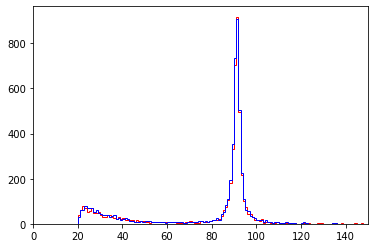

In [40]:
plt.hist(muon_mass,bins=150,range=(0,150),color='red',histtype='step')
plt.hist(dilepton_mass,bins=150,range=(0,150),color='blue',histtype='step')
plt.xlim(0,150)
plt.show()